# Data Glacier - Week 02

### Import Libraries

In [1]:
# Pandas is necessary for array manipulation and calculation
import pandas as pd
from pandas import DataFrame

# Matplotlib library to create visualizations
import matplotlib.pyplot as plt

# Missingno used for missing data visualization
import missingno as msno

# NumPy necessary for statistical calculations
import numpy as np
np.set_printoptions(threshold=np.inf)

# Change theme of graphs
plt.style.use('fivethirtyeight')

# Export images from Jupyter to PDF
%matplotlib inline

# Import Seaborn to graph distplots and boxplots
import seaborn as sns

### Import Datasets

In [2]:
# Cleaned cab_data dataset
cab_df = pd.read_csv('C:/Users/Richard/Documents/GitHub/DataGlacier/Week 02/Datasets/cab_data_cleaned.csv')
customer_id = pd.read_csv('C:/Users/Richard/Documents/GitHub/DataGlacier/Week 02/Datasets/customer_ID_cleaned.csv')
transaction_id = pd.read_csv('C:/Users/Richard/Documents/GitHub/DataGlacier/Week 02/Datasets/transaction_ID_cleaned.csv')
nyc_weather = pd.read_csv('C:/Users/Richard/Documents/GitHub/DataGlacier/Week 02/Datasets/nyc_weather_cleaned.csv')

# Cab Data Exploratory Data Analysis

### View Headers

In [3]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10002654,1/9/2016,1,WASHINGTON DC,3.54,56.03,48.4272
1,10002655,1/14/2016,1,WASHINGTON DC,28.08,412.28,343.6992
2,10002656,1/9/2016,1,WASHINGTON DC,35.96,665.56,431.5200
3,10002657,1/13/2016,1,WASHINGTON DC,8.96,144.84,118.2720
4,10002658,1/13/2016,1,WASHINGTON DC,18.54,277.71,224.7048


### Verify Data types

In [4]:
cab_df.dtypes

Transaction ID      int64
Date of Travel     object
Company             int64
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

### Check for null values

In [5]:
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

### Remove Duplicates

In [6]:
cab_df = cab_df.drop_duplicates()

### Calculate five-number summary including interquartile range

In [7]:
cab_df.describe()

,Transaction ID,Company,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,1.235706,22.567254,423.443311,286.190113
std,1.268058e+05,0.424440,12.233526,274.378911,157.993661
min,1.000001e+07,1.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,1.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,1.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,1.000000,32.960000,583.660000,413.683200
max,1.044011e+07,2.000000,48.000000,2048.030000,691.200000


### Calculate Standard Deviation

In [8]:
cab_df.std()

Transaction ID    126805.803715
Company                0.424440
KM Travelled          12.233526
Price Charged        274.378911
Cost of Trip         157.993661
dtype: float64

### Calculate Mode

In [9]:
cab_df.mode(axis=0, numeric_only=False, dropna=True)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/5/2018,1.0,NEW YORK NY,33.6,191.27,362.88
1,10000012,NaN,NaN,NaN,NaN,298.32,NaN
2,10000013,NaN,NaN,NaN,NaN,NaN,NaN
3,10000014,NaN,NaN,NaN,NaN,NaN,NaN
4,10000015,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
359387,10440101,NaN,NaN,NaN,NaN,NaN,NaN
359388,10440104,NaN,NaN,NaN,NaN,NaN,NaN
359389,10440105,NaN,NaN,NaN,NaN,NaN,NaN
359390,10440106,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate Skewness

In [10]:
cab_df.skew()

Transaction ID    0.000072
Company           1.245382
KM Travelled      0.055779
Price Charged     0.873761
Cost of Trip      0.137958
dtype: float64

### Calculate Kurtosis

In [11]:
kurt = cab_df.kurt(axis=0)
print(kurt)

Transaction ID   -1.198925
Company          -0.449026
KM Travelled     -1.126875
Price Charged     0.747635
Cost of Trip     -1.012233
dtype: float64


### Calculate Variance

In [12]:
np.var(cab_df, axis = 0)

Transaction ID    1.607967e+10
Company           1.801489e-01
KM Travelled      1.496587e+02
Price Charged     7.528358e+04
Cost of Trip      2.496193e+04
dtype: float64

### Drop object variables from calculations

In [13]:
cab_df_int = cab_df.drop(['Date of Travel', 'Company', 'City'], axis=1)

In [14]:
cab_df_int.dtypes

Transaction ID      int64
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

### Calculate Median

In [15]:
median_array = np.median(cab_df_int, axis=0)
print(median_array)

[1.02210355e+07 2.24400000e+01 3.86360000e+02 2.82480000e+02]


### Calculate Frequency Bins

array([[<AxesSubplot:title={'center':'KM Travelled'}>]], dtype=object)

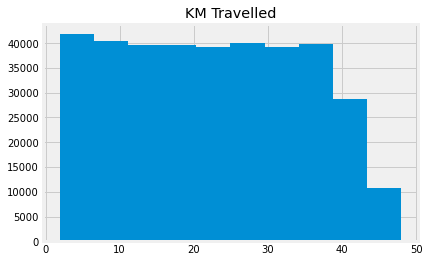

In [16]:
cab_df[['KM Travelled']].hist()

array([[<AxesSubplot:title={'center':'Price Charged'}>]], dtype=object)

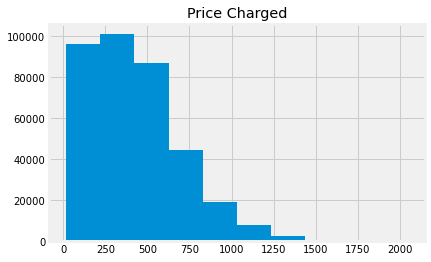

In [17]:
cab_df[['Price Charged']].hist()

array([[<AxesSubplot:title={'center':'Cost of Trip'}>]], dtype=object)

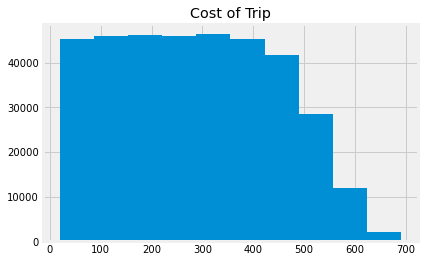

In [18]:
cab_df[['Cost of Trip']].hist()

### Create Univariate Distribution Plots

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


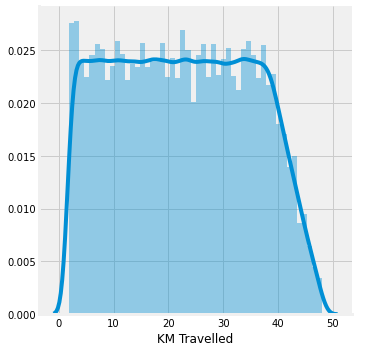

In [19]:
sns.FacetGrid(cab_df,height=5).map(sns.distplot,"KM Travelled").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


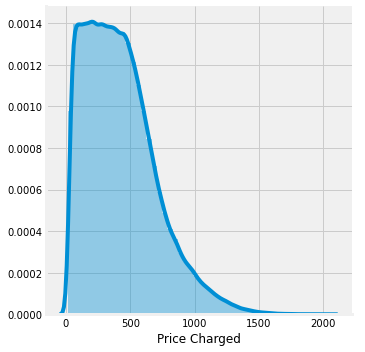

In [20]:
sns.FacetGrid(cab_df,height=5).map(sns.distplot,"Price Charged").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


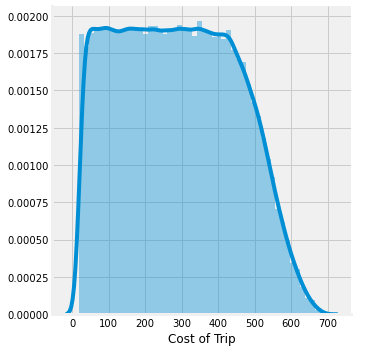

In [21]:
sns.FacetGrid(cab_df,height=5).map(sns.distplot,"Cost of Trip").add_legend()

### Boxplots

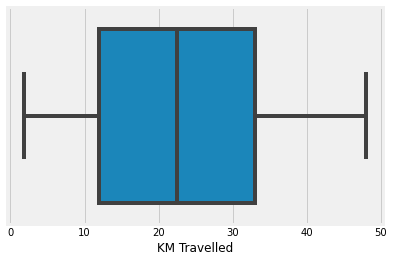

In [22]:
sns.boxplot(x="KM Travelled",data=cab_df)
plt.show()

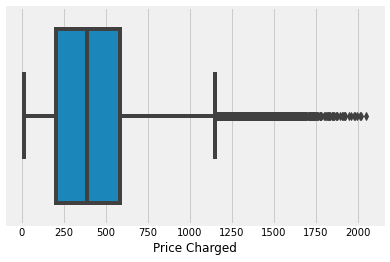

In [23]:
sns.boxplot(x="Price Charged",data=cab_df)
plt.show()

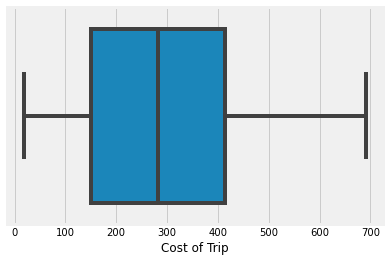

In [24]:
sns.boxplot(x="Cost of Trip",data=cab_df)
plt.show()

# Customer Exploratory Data Analysis

### View Headers

In [25]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,1,28,10813
1,27703,1,27,9237
2,28712,1,53,11242
3,28020,1,23,23327
4,27182,1,33,8536


### Verify Data Types

In [26]:
customer_id.dtypes

Customer ID           int64
Gender                int64
Age                   int64
Income (USD/Month)    int64
dtype: object

### Check for null values

In [27]:
customer_id.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

### Remove Duplicates

In [28]:
customer_id = customer_id.drop_duplicates()

### Calculate five-number summary including interquartile range

In [29]:
customer_id.describe()

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000,49171.000000
mean,28398.252283,1.459804,35.363121,15015.631856
std,17714.137333,0.498387,12.599066,8002.208253
min,1.000000,1.000000,18.000000,2000.000000
25%,12654.500000,1.000000,25.000000,8289.500000
50%,27631.000000,1.000000,33.000000,14656.000000
75%,43284.500000,2.000000,42.000000,21035.000000
max,60000.000000,2.000000,65.000000,35000.000000


### Calculate Standard Deviation

In [30]:
customer_id.std()

Customer ID           17714.137333
Gender                    0.498387
Age                      12.599066
Income (USD/Month)     8002.208253
dtype: float64

### Calculate Mode

In [31]:
customer_id.mode(axis=0, numeric_only=False, dropna=True)

,Customer ID,Gender,Age,Income (USD/Month)
0,1,1.0,20.0,8497.0
1,2,NaN,NaN,NaN
2,3,NaN,NaN,NaN
3,4,NaN,NaN,NaN
4,5,NaN,NaN,NaN
...,...,...,...,...
49166,59996,NaN,NaN,NaN
49167,59997,NaN,NaN,NaN
49168,59998,NaN,NaN,NaN
49169,59999,NaN,NaN,NaN


### Calculate Skewness

In [32]:
customer_id.skew()

Customer ID           0.141494
Gender                0.161313
Age                   0.685934
Income (USD/Month)    0.313148
dtype: float64

### Calculate Kurtosis

In [33]:
c_kurt = customer_id.kurt(axis=0)
print(c_kurt)

Customer ID          -1.192502
Gender               -1.974058
Age                  -0.451938
Income (USD/Month)   -0.672325
dtype: float64


### Calculate Variance

In [34]:
np.var(customer_id, axis=0)

Customer ID           3.137843e+08
Gender                2.483842e-01
Age                   1.587332e+02
Income (USD/Month)    6.403403e+07
dtype: float64

### Calculate Median

In [35]:
np.median(customer_id, axis = 0)

array([2.7631e+04, 1.0000e+00, 3.3000e+01, 1.4656e+04])

### Calculate Frequency Bins

array([[<AxesSubplot:title={'center':'Gender'}>]], dtype=object)

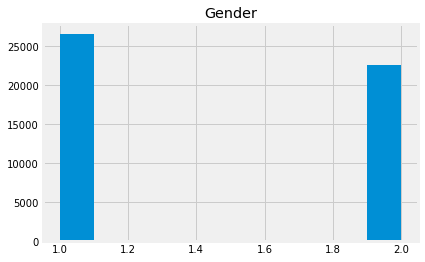

In [36]:
customer_id[["Gender"]].hist()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

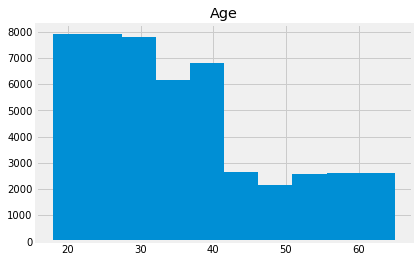

In [37]:
customer_id[["Age"]].hist()

array([[<AxesSubplot:title={'center':'Income (USD/Month)'}>]],
      dtype=object)

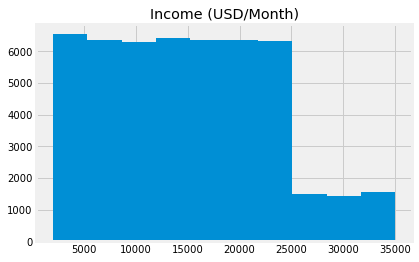

In [38]:
customer_id[["Income (USD/Month)"]].hist()

### Create Univariate Distribution Plots

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


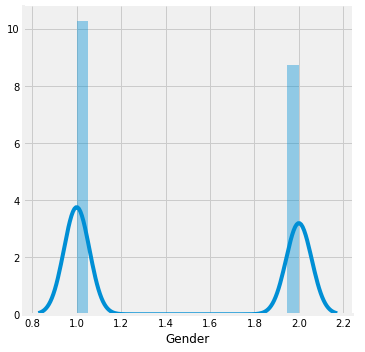

In [39]:
sns.FacetGrid(customer_id,height=5).map(sns.distplot,"Gender").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


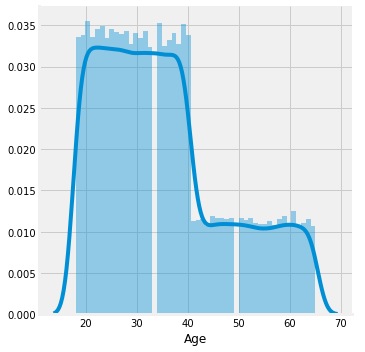

In [40]:
sns.FacetGrid(customer_id,height=5).map(sns.distplot,"Age").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


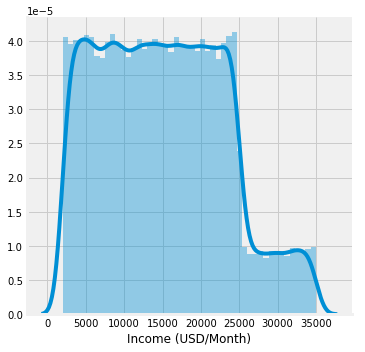

In [41]:
sns.FacetGrid(customer_id,height=5).map(sns.distplot,"Income (USD/Month)").add_legend()

### Boxplots

<AxesSubplot:xlabel='Gender'>

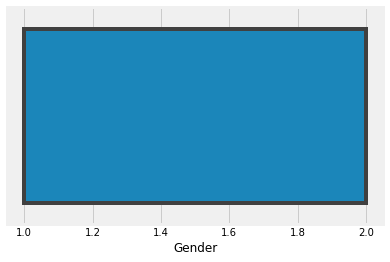

In [42]:
sns.boxplot(x="Gender",data=customer_id)

<AxesSubplot:xlabel='Age'>

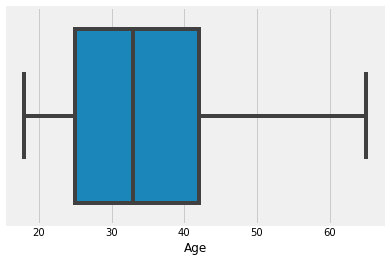

In [43]:
sns.boxplot(x="Age",data=customer_id)

<AxesSubplot:xlabel='Income (USD/Month)'>

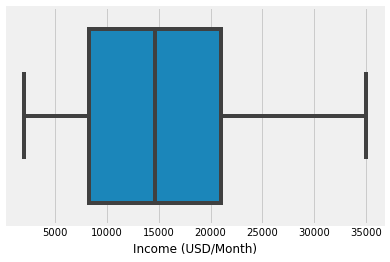

In [44]:
sns.boxplot(x="Income (USD/Month)",data=customer_id)

# Transaction Exploratory Data Analysis

### View Headers

In [45]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10065547,7594,1
1,10065548,6490,1
2,10065549,8173,2
3,10065550,8191,2
4,10065551,7091,1


### Verify Data Types

In [46]:
transaction_id.dtypes

Transaction ID    int64
Customer ID       int64
Payment_Mode      int64
dtype: object

### Check for Null Values

In [47]:
transaction_id.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

### Remove Duplicates

In [48]:
transaction_id = transaction_id.drop_duplicates()

### Calculate five-number summary including interquartile range

In [49]:
transaction_id.describe()

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098.000000
mean,1.022006e+07,23619.513120,1.400154
std,1.270455e+05,21195.549816,0.489930
min,1.000001e+07,1.000000,1.000000
25%,1.011004e+07,3530.000000,1.000000
50%,1.022006e+07,15168.000000,1.000000
75%,1.033008e+07,43884.000000,2.000000
max,1.044011e+07,60000.000000,2.000000


### Calculate Standard Deviation

In [50]:
transaction_id.std()

Transaction ID    127045.493722
Customer ID        21195.549816
Payment_Mode           0.489930
dtype: float64

### Calculate Mode

In [51]:
transaction_id.mode(axis=0, numeric_only=False, dropna=True)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,494.0,1.0
1,10000012,NaN,NaN
2,10000013,NaN,NaN
3,10000014,NaN,NaN
4,10000015,NaN,NaN
...,...,...,...
440093,10440104,NaN,NaN
440094,10440105,NaN,NaN
440095,10440106,NaN,NaN
440096,10440107,NaN,NaN


### Calculate Skewness

In [52]:
transaction_id.skew()

Transaction ID    4.992619e-17
Customer ID       3.411342e-01
Payment_Mode      4.075946e-01
dtype: float64

### Calculate Kurtosis

In [53]:
transaction_id.kurt(axis=0)

Transaction ID   -1.200000
Customer ID      -1.560810
Payment_Mode     -1.833875
dtype: float64

### Calculate Variance

In [54]:
np.var(transaction_id, axis=0)

Transaction ID    1.614052e+10
Customer ID       4.492503e+08
Payment_Mode      2.400308e-01
dtype: float64

### Calculate Median

In [55]:
np.median(transaction_id, axis=0)

array([1.02200595e+07, 1.51680000e+04, 1.00000000e+00])

### Calculate Frequency Bins

array([[<AxesSubplot:title={'center':'Payment_Mode'}>]], dtype=object)

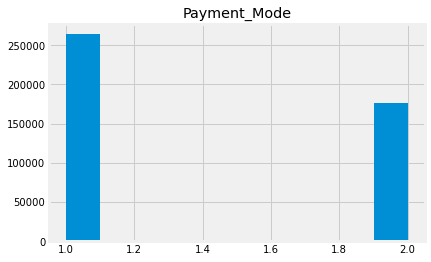

In [56]:
transaction_id[["Payment_Mode"]].hist()

### Create Univariate Distribution Plots

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


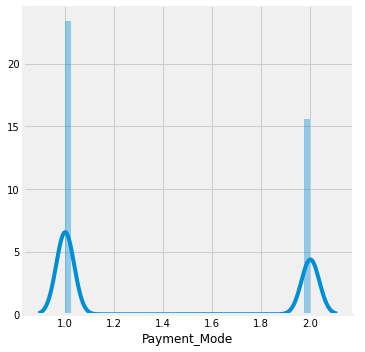

In [57]:
sns.FacetGrid(transaction_id,height=5).map(sns.distplot,"Payment_Mode").add_legend()

### Boxplots

<AxesSubplot:xlabel='Payment_Mode'>

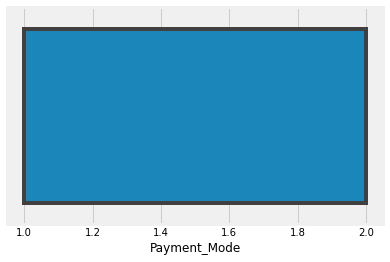

In [58]:
sns.boxplot(x="Payment_Mode",data=transaction_id)

# NYC Weather Dataset Exploratory Data Analysis

In [59]:
nyc_weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1/1/2016,42,34,38.0,0.0,0.0,0
1,1/2/2016,40,32,36.0,0.0,0.0,0
2,1/3/2016,45,35,40.0,0.0,0.0,0
3,1/4/2016,36,14,25.0,0.0,0.0,0
4,1/5/2016,29,11,20.0,0.0,0.0,0


### Verify Data Types

In [60]:
nyc_weather.dtypes

date                    object
maximum temperature      int64
minimum temperature      int64
average temperature    float64
precipitation          float64
snow fall              float64
snow depth               int64
dtype: object

### Check for null values

In [61]:
nyc_weather.isnull().sum()

date                   0
maximum temperature    0
minimum temperature    0
average temperature    0
precipitation          0
snow fall              0
snow depth             0
dtype: int64

### Remove Duplicates

In [62]:
nyc_weather = nyc_weather.drop_duplicates()

### Calculate five-number summary including interquartile range

In [63]:
nyc_weather.describe()

,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,66.063584,51.078035,58.570809,0.117428,0.101445,0.228324
std,17.442128,16.069495,16.564806,0.316888,1.482408,1.599785
min,15.000000,-1.000000,7.000000,0.000000,0.000000,0.000000
25%,53.000000,39.000000,46.500000,0.000000,0.000000,0.000000
50%,66.000000,50.000000,58.000000,0.000000,0.000000,0.000000
75%,82.000000,66.000000,74.000000,0.030000,0.000000,0.000000
max,96.000000,81.000000,88.500000,2.310000,27.300000,19.000000


### Calculate Standard Deviation

In [64]:
nyc_weather.std()

maximum temperature    17.442128
minimum temperature    16.069495
average temperature    16.564806
precipitation           0.316888
snow fall               1.482408
snow depth              1.599785
dtype: float64

### Calculate Mode

In [65]:
nyc_weather.mode(axis=0, numeric_only=False, dropna=True)

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1/1/2016,83.0,40.0,54.0,0.0,0.0,0.0
1,1/10/2016,NaN,NaN,NaN,NaN,NaN,NaN
2,1/11/2016,NaN,NaN,NaN,NaN,NaN,NaN
3,1/13/2016,NaN,NaN,NaN,NaN,NaN,NaN
4,1/15/2016,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
341,9/5/2016,NaN,NaN,NaN,NaN,NaN,NaN
342,9/6/2016,NaN,NaN,NaN,NaN,NaN,NaN
343,9/7/2016,NaN,NaN,NaN,NaN,NaN,NaN
344,9/8/2016,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate Skewness

In [66]:
nyc_weather.skew()

maximum temperature    -0.298999
minimum temperature    -0.233597
average temperature    -0.269476
precipitation           3.983158
snow fall              18.038265
snow depth              9.141424
dtype: float64

### Calculate Kurtosis

In [67]:
nyc_weather.kurt(axis=0)

maximum temperature     -0.803682
minimum temperature     -0.638400
average temperature     -0.729465
precipitation           18.594806
snow fall              331.258527
snow depth              93.278447
dtype: float64

### Calculate Variance

In [68]:
np.var(nyc_weather, axis=0)

maximum temperature    303.348558
minimum temperature    257.482350
average temperature    273.599755
precipitation            0.100128
snow fall                2.191183
snow depth               2.551915
dtype: float64

### Drop object variables from calculations

In [72]:
nyc_weather = nyc_weather.drop('date', axis=1)

### Calculate Median

In [73]:
np.median(nyc_weather, axis=0)

array([66., 50., 58.,  0.,  0.,  0.])

### Calculate Frequency Bins

array([[<AxesSubplot:title={'center':'maximum temperature'}>]],
      dtype=object)

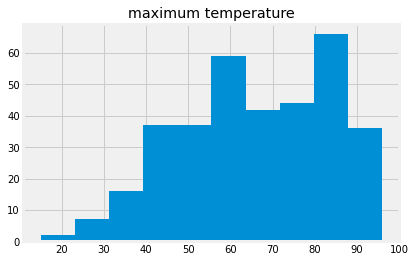

In [74]:
nyc_weather[["maximum temperature"]].hist()

array([[<AxesSubplot:title={'center':'minimum temperature'}>]],
      dtype=object)

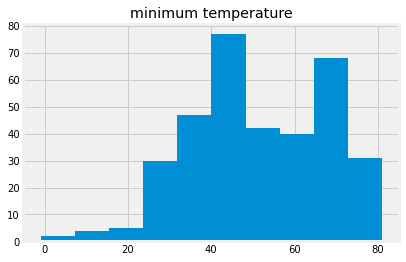

In [75]:
nyc_weather[["minimum temperature"]].hist()

array([[<AxesSubplot:title={'center':'average temperature'}>]],
      dtype=object)

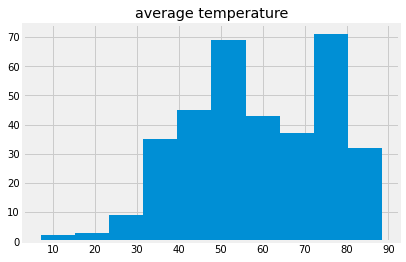

In [76]:
nyc_weather[["average temperature"]].hist()

array([[<AxesSubplot:title={'center':'precipitation'}>]], dtype=object)

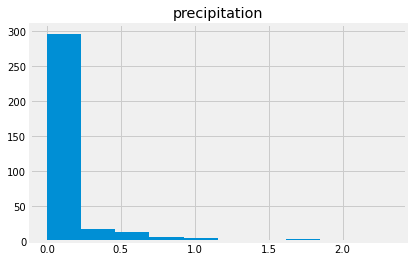

In [77]:
nyc_weather[["precipitation"]].hist()

array([[<AxesSubplot:title={'center':'snow fall'}>]], dtype=object)

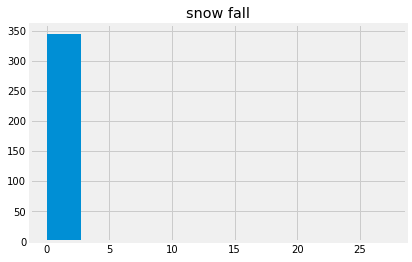

In [78]:
nyc_weather[["snow fall"]].hist()

array([[<AxesSubplot:title={'center':'snow depth'}>]], dtype=object)

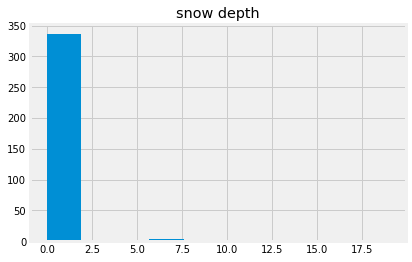

In [79]:
nyc_weather[["snow depth"]].hist()

### Create Univariate Distribution Plots

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


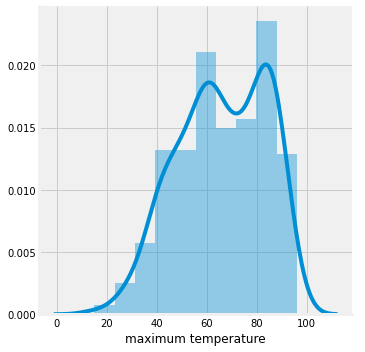

In [80]:
sns.FacetGrid(nyc_weather,height=5).map(sns.distplot,"maximum temperature").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


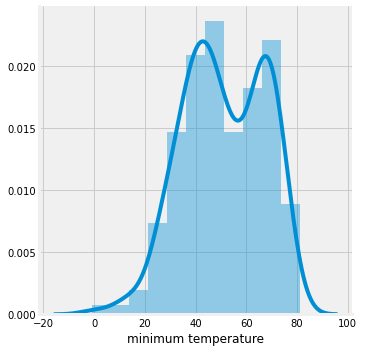

In [81]:
sns.FacetGrid(nyc_weather,height=5).map(sns.distplot,"minimum temperature").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


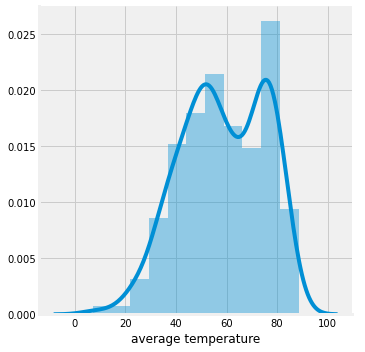

In [82]:
sns.FacetGrid(nyc_weather,height=5).map(sns.distplot,"average temperature").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


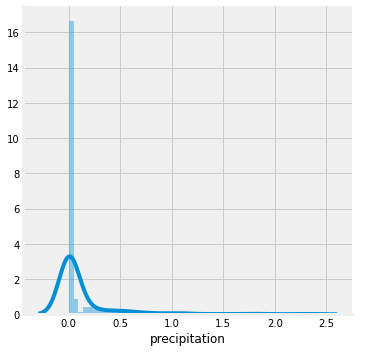

In [83]:
sns.FacetGrid(nyc_weather,height=5).map(sns.distplot,"precipitation").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


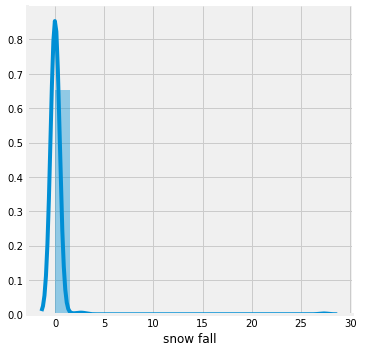

In [84]:
sns.FacetGrid(nyc_weather,height=5).map(sns.distplot,"snow fall").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


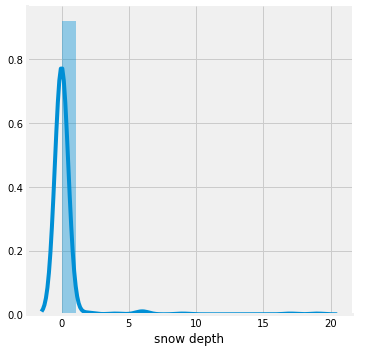

In [85]:
sns.FacetGrid(nyc_weather,height=5).map(sns.distplot,"snow depth").add_legend()

### Boxplots

<AxesSubplot:xlabel='maximum temperature'>

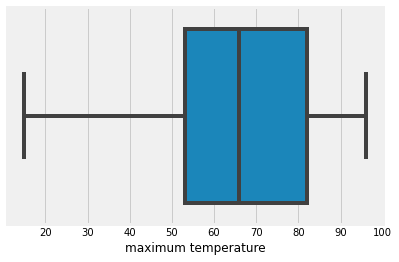

In [86]:
sns.boxplot(x="maximum temperature",data=nyc_weather)

<AxesSubplot:xlabel='minimum temperature'>

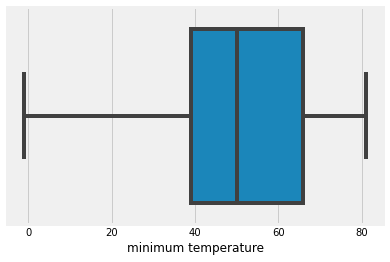

In [87]:
sns.boxplot(x="minimum temperature",data=nyc_weather)

<AxesSubplot:xlabel='average temperature'>

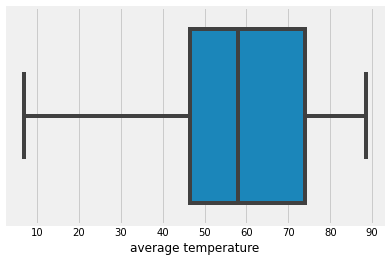

In [88]:
sns.boxplot(x="average temperature",data=nyc_weather)

<AxesSubplot:xlabel='precipitation'>

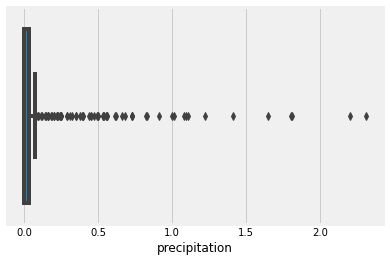

In [89]:
sns.boxplot(x="precipitation",data=nyc_weather)

<AxesSubplot:xlabel='snow fall'>

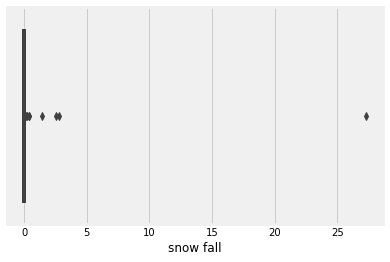

In [90]:
sns.boxplot(x="snow fall",data=nyc_weather)

<AxesSubplot:xlabel='snow depth'>

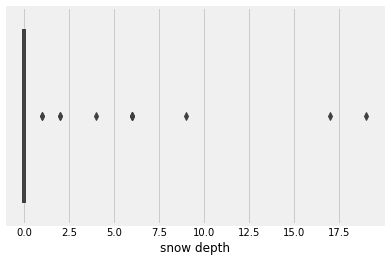

In [91]:
sns.boxplot(x="snow depth",data=nyc_weather)